## 1.1 imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1.2 data load

In [2]:
url = 'datasets\kc_house_data.csv'
data = pd.read_csv(url)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21613, 21)

# 2.  data description

## 2.1 Variables dict

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 2.2 data types

In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 2.3 change variable type

In [5]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = pd.to_datetime(data['date']).dt.month
data['bathrooms'] = data['bathrooms'].astype('int64')
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
dtype: object

## 2.4 NaN Checking

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
dtype: int64

## 2.5 Descriptive Statistical

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,1.749734e+00,7.348731e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# 3.0 Data Clean

## 3.1 Removing outliers

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

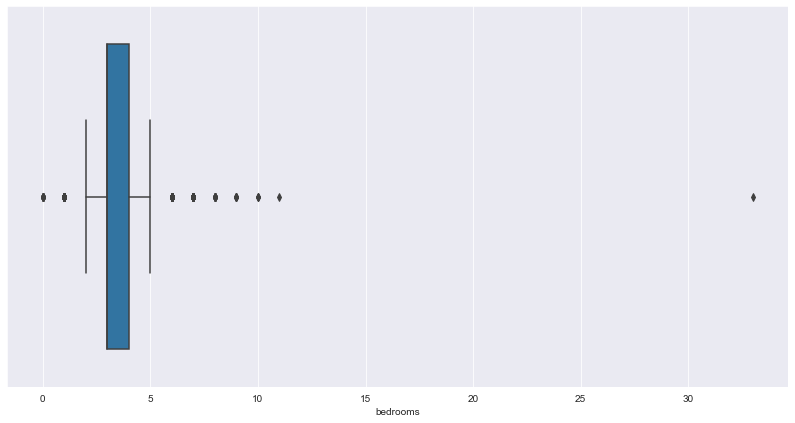

In [8]:
plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.boxplot(data['bedrooms'])

In [9]:
data['bedrooms'].max()


33

In [10]:
data.loc[data['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
15870,2402100895,2014-06-25,640000.0,33,1,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,6


In [11]:
data = data.drop([15870]).reset_index()

## 3.2 droping duplicates

In [12]:
data['id'].value_counts().head()

795000620     3
723049156     2
3323059027    2
2422049104    2
7524400250    2
Name: id, dtype: int64

In [13]:
data.drop_duplicates(subset=['id'], inplace=True, keep='first')
data = data.reset_index(drop=True)

In [14]:
data['id'].value_counts().head()

7129300520    1
3543900418    1
8137500730    1
104500730     1
7575610760    1
Name: id, dtype: int64

In [15]:
data.shape

(21435, 23)

In [16]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


# 4. Business Questions

## 4.1 WHAT HOUSES ARE THE BEST OPPORTUNITIES TO BUY?

            - Grouping the price by the zipcode
            - Find the median price to any zipcode
            - If (house price < median price ) & (house condition >= 3 ) = buy 

### 4.1.1 Grouping the price by the zipcode to find the purchase pattern

In [17]:
zipc = data[['price', 'zipcode']].groupby('zipcode').median().reset_index()
zipc.rename(columns={'price': 'median_price', 'zipcode': 'zipcode'}, inplace=True)
zipc.head()


,zipcode,median_price
0,98001,260000.0
1,98002,235000.0
2,98003,266500.0
3,98004,1150000.0
4,98005,765475.0


### 4.1.2 Concating the median price by zipcode in the original data

In [18]:
for i in range(len(data)):
    for k in range(len(zipc)):
        if data.loc[i,'zipcode'] == zipc.loc[k, 'zipcode']:
            data.loc[i, 'median_by_zipcode'] = zipc.loc[k, 'median_price']

In [19]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,median_by_zipcode
0,0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,279000.0
1,1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,425000.0
2,2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,442500.0
3,3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,489950.0
4,4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,645000.0


### 4.1.3 setting the situation 

In [20]:
for i in range(len(data)):
    if (data.loc[i, 'price'] < data.loc[i, 'median_by_zipcode']) & (data.loc[i, 'condition'] >= 3):
        data.loc[i, 'situation'] = 'to_buy'
    else:
        data.loc[i, 'situation'] = 'not_to_buy'

## 4.2 WHAT IS THE BEST MOMENT TO SELL HOUSES?'

            -Get the median price by season grouping the price by zipcode and season
            -The higher value is the best season to sell the house
            -If (price < best season to sell price): resell price = best season to sell price
             else: resell price = price*1.1
                    
                    

### 4.2.1 Creating season column

In [21]:
data['season'] = data['month'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
    'spring' if (x > 2) & (x < 5) else
    'fall' if (x > 8) & (x < 12) else
    'winter')

### 4.2.2 grouping the price by season and zipcode 

In [22]:
x = data[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index()
x.rename(columns={'zipcode': 'zipcode', 'season': 'season', 'price': 'median_price'}, inplace=True)
x.head()

,zipcode,season,median_price
0,98001,fall,249950.0
1,98001,spring,285000.0
2,98001,summer,262750.0
3,98001,winter,258950.0
4,98002,fall,235000.0


### 4.2.3 concating the season_max and the higher value 

In [23]:
ziphigh = []
for i in range(3, len(x), 4):
    zipcode = x.loc[i, 'zipcode']
    ziphigh.append(x.loc[i - 3, 'median_price'])
    ziphigh.append(x.loc[i - 2, 'median_price'])
    ziphigh.append(x.loc[i - 1, 'median_price'])
    ziphigh.append(x.loc[i, 'median_price'])
    x.loc[i - 3, 'max_price'] = max(ziphigh)
    x.loc[i - 2, 'max_price'] = max(ziphigh)
    x.loc[i - 1, 'max_price'] = max(ziphigh)
    x.loc[i, 'max_price'] = max(ziphigh)
    if len(ziphigh) == 4:
        p = 0
        s = str(x.loc[(x['median_price'] == max(ziphigh)) & (x['zipcode'] == zipcode), 'season'])
        season_max = s.split()[1]
        for k in range(len(data)):
            if data.loc[k, 'zipcode'] == zipcode:
                data.loc[k, 'season_to_sell'] = season_max
                f = list(x.loc[x['zipcode']==zipcode,'max_price'])
                data.loc[k,'season_max_price'] = f[0]
                

        for j in range(4):

            x.loc[i - j, 'season_max'] = season_max
            p = p + 1
            if p == 4:
                ziphigh = []
x.head()

,zipcode,season,median_price,max_price,season_max
0,98001,fall,249950.0,285000.0,spring
1,98001,spring,285000.0,285000.0,spring
2,98001,summer,262750.0,285000.0,spring
3,98001,winter,258950.0,285000.0,spring
4,98002,fall,235000.0,242000.0,winter


In [24]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,month,median_by_zipcode,situation,season,season_to_sell,season_max_price
0,0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,...,47.5112,-122.257,1340,5650,10,279000.0,to_buy,fall,fall,290500.0
1,1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,...,47.7210,-122.319,1690,7639,12,425000.0,not_to_buy,winter,fall,431750.0
2,2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,...,47.7379,-122.233,2720,8062,2,442500.0,to_buy,winter,spring,455000.0
3,3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,...,47.5208,-122.393,1360,5000,12,489950.0,not_to_buy,winter,spring,550750.0
4,4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,...,47.6168,-122.045,1800,7503,2,645000.0,to_buy,winter,spring,660000.0


### 4.2.4 create profit column

In [25]:
for i in range(len(data)):
    if data.loc[i, 'price'] < data.loc[i,'season_max_price']:
        data.loc[i, 'resell_min'] = data.loc[i, 'season_max_price'] 
    else:
        data.loc[i, 'resell_min'] = data.loc[i, 'price'] * 1.1
    data.loc[i, 'profit'] = data.loc[i,'resell_min'] - data.loc[i, 'price']

In [26]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,month,median_by_zipcode,situation,season,season_to_sell,season_max_price,resell_min,profit
0,0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,...,1340,5650,10,279000.0,to_buy,fall,fall,290500.0,290500.0,68600.0
1,1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,...,1690,7639,12,425000.0,not_to_buy,winter,fall,431750.0,591800.0,53800.0
2,2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,...,2720,8062,2,442500.0,to_buy,winter,spring,455000.0,455000.0,275000.0
3,3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,...,1360,5000,12,489950.0,not_to_buy,winter,spring,550750.0,664400.0,60400.0
4,4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,...,1800,7503,2,645000.0,to_buy,winter,spring,660000.0,660000.0,150000.0


In [29]:
data.loc[data['situation']=='to_buy','profit'].sum()

1437571653.0

In [32]:
data.loc[data['situation']=='to_buy'].shape

(10499, 30)

In [37]:
aux = data[['price','season_to_sell']].groupby('season_to_sell').mean().reset_index()
aux.sort_values(by='price', ascending=False, inplace=True)
barplot('season_to_sell','price', aux)

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'